<a href="https://colab.research.google.com/github/jotadram6/EACD-02-ESTADISTICA/blob/master/Sesi%C3%B3n_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso Estadística y Análisis exploratorio
Profesor: José David Ruiz Álvarez

Correo: josed.ruiz@udea.edu.co

## Sesión 4

### Intervalos de confianza

### Aplicación de conceptos y métodos del curso


#Empecemos con Intervalos de confianza

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def RectaConVariabilidad(xmin,xmax,m,b,puntos,mu=0,sigma=0.2):
  return np.linspace(xmin,xmax,puntos),m*np.linspace(xmin,xmax,puntos)+b+np.random.normal(mu,sigma,puntos)

In [4]:
def Line_chi2(Obs,x,m,b):
  if len(Obs)!=len(x):
    print("Debe haber la misma cantidad de puntos observados como de x")
    return
  Chi2=((Obs-(m*x+b))**2)/(np.sqrt((m*x+b)**2))
  return sum(Chi2)

In [15]:
def mb_estimator(x,y,m_min,m_max,m_n,b_min,b_max,b_n,v=False):
  m_scan=np.linspace(m_min,m_max,m_n)
  b_scan=np.linspace(b_min,b_max,b_n)
  chi2scan=[]
  for i in m_scan:
    for j in b_scan:
      chi2scan.append([i,j,Line_chi2(y,x,i,j)])
  OnlyChi2=np.array(chi2scan).take(indices=2,axis=1)
  MinChi2=OnlyChi2.min()
  ArgMinChi2=OnlyChi2.argmin()
  if v: print("Chi2 mínimo encontrado:",MinChi2)
  bestm=np.array(chi2scan).take(indices=0,axis=1)[ArgMinChi2]
  bestb=np.array(chi2scan).take(indices=1,axis=1)[ArgMinChi2]
  if v: print("Parámetros m y b encontrados:",bestm,bestb)
  return MinChi2, bestm, bestb

In [6]:
Pendiente=np.random.uniform(0.1,3)
Intercepto=np.random.uniform(5,10)
print(Pendiente,Intercepto)

2.553760688594244 9.603288153680356


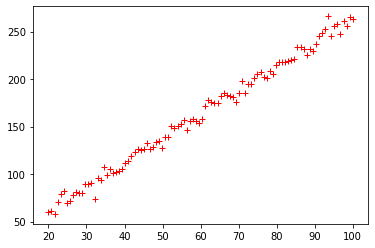

In [7]:
RectaPrincipal=RectaConVariabilidad(20,100,Pendiente,Intercepto,100,sigma=5)
plt.plot(RectaPrincipal[0],RectaPrincipal[1],'r+')

In [16]:
ResultadosEstimador=mb_estimator(RectaPrincipal[0],RectaPrincipal[1],0.1,3,100,5,10,100,v=True)

Chi2 mínimo encontrado: 20.51919630585109
Parámetros m y b encontrados: 2.5606060606060606 9.595959595959595


## Muestreo del test estadístico y de los estimadores

In [19]:
NSample=1000
Chi2Sampling=[]
bSampling=[]
mSampling=[]
for i in range(NSample):
  RectaExperim=RectaConVariabilidad(20,100,Pendiente,Intercepto,100,sigma=5)
  ResultadosEstimador=mb_estimator(RectaExperim[0],RectaExperim[1],0.1,3,100,5,10,100)
  Chi2Sampling.append(ResultadosEstimador[0])
  bSampling.append(ResultadosEstimador[2])
  mSampling.append(ResultadosEstimador[1])

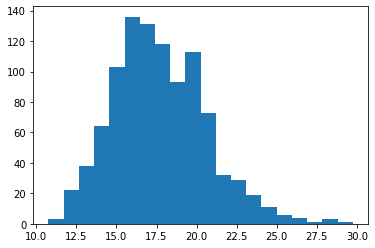

In [20]:
Chi2Histo=plt.hist(Chi2Sampling, bins=20)

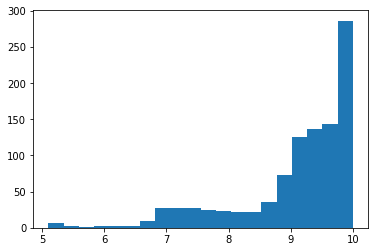

In [21]:
bHisto=plt.hist(bSampling, bins=20)

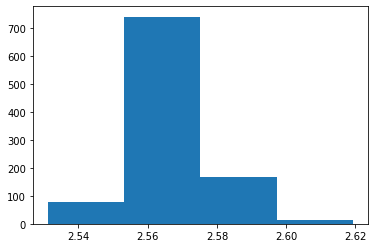

In [28]:
mHisto=plt.hist(mSampling, bins=4)

In [23]:
MaskToIntegrate=np.array(Chi2Histo[1][:-1])>=ResultadosEstimador[0]
pvalue_h0=sum(np.multiply(MaskToIntegrate,np.array(Chi2Histo[0])))/sum(Chi2Histo[0])
print("El valor p para la hipótesis es:", pvalue_h0)

El valor p para la hipótesis es: 0.77


## Intervalos de confianza para ambos parámetros a diferentes niveles de confianza

In [25]:
Beta68=0.16; Alpha68=Beta68+0.68
m68min=np.quantile(mSampling,Beta68)
m68max=np.quantile(mSampling,Alpha68)
print("El intervalo de confianza a 68% CL para m es:",m68min,m68max)

El intervalo de confianza a 68% CL para m es: 2.5606060606060606 2.58989898989899


In [27]:
Beta95=0.025; Alpha95=Beta95+0.95
m95min=np.quantile(mSampling,Beta95)
m95max=np.quantile(mSampling,Alpha95)
print("El intervalo de confianza a 95% CL para m es:",m95min,m95max)

El intervalo de confianza a 95% CL para m es: 2.5313131313131314 2.5898989898989897


In [29]:
b68min=np.quantile(bSampling,Beta68)
b68max=np.quantile(bSampling,Alpha68)
print("El intervalo de confianza a 68% CL para b es:",b68min,b68max)

El intervalo de confianza a 68% CL para b es: 8.131313131313131 10.0


In [30]:
b95min=np.quantile(bSampling,Beta95)
b95max=np.quantile(bSampling,Alpha95)
print("El intervalo de confianza a 95% CL para b es:",b95min,b95max)

El intervalo de confianza a 95% CL para b es: 6.767676767676768 10.0


[(5.0, 12.0), (2.5, 2.6)]

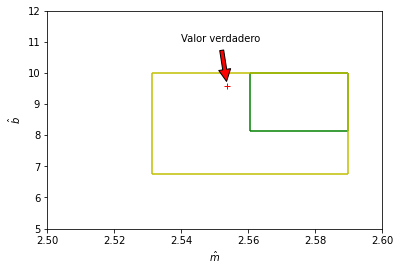

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hlines(b68min,m68min,m68max,"g")
ax.hlines(b68max,m68min,m68max,"g")
ax.vlines(m68min,b68min,b68max,"g")
ax.vlines(m68max,b68min,b68max,"g")
ax.hlines(b95min,m95min,m95max,"y")
ax.hlines(b95max,m95min,m95max,"y")
ax.vlines(m95min,b95min,b95max,"y")
ax.vlines(m95max,b95min,b95max,"y")
ax.plot(Pendiente,Intercepto,"r+")
ax.annotate('Valor verdadero', xy=(Pendiente,Intercepto), xytext=(2.54, 11),
            arrowprops=dict(facecolor='red', shrink=0.1))
ax.set_xlabel("$\hat{m}$")
ax.set_ylabel("$\hat{b}$")
ax.set(xlim=(2.5, 2.6), ylim=(5, 12))

##Ejercicio 1: 
Repita el mismo procedimiento pero para la estimación de los intervalos de confianza pero usando

RectaConVariabilidad(50,100,Pendiente,Intercepto,100,sigma=15)

##Ejercicio 2: 
Repita el mismo ejercicio pero utilizando la verosimilitud como test estadístico en lugar del chi2.

##Ejercicio 3:
Tome los datos del repositorio central llamados Xcsv y Y.csv y trate de modelarlos con las herramientas vistas:
1. Haga una exploración gráfica.
2. Plantee una hipótesis.
3. Defina un test estadístico.
4. Obtenga los parámetros que mejor ajustan los datos seún su hipótesis.
5. Calcule qué tan bien se ajusta su modelo con el p-value.
6. Obtenga el intervalo de confianza de sus parámetros para 68% y 95% CL.